In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widget

In [2]:
ufo = pd.read_csv("/users/davidpoon/Desktop/poon_david_assignment4/ufo-scrubbed-geocoded-time-standardized-00.csv",
                 names = ["date", "city", "state", "country",
                         "shape", "duration_seconds", "duration",
                         "comment", "report_date", "latitude", "longitude"],
                 parse_dates = ["date", "report_date"])

In [3]:
ufo

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [4]:
ufo = ufo.fillna({'country' : 'unknown', 'state': 'unknown', 'shape': 'unknown'})

In [5]:
ufo

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,unknown,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),unknown,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [6]:
nsamples = 100
downSampleMask = np.random.choice(range(len(ufo)-1), nsamples, replace = False)

In [7]:
ufoDS = ufo.loc[downSampleMask]

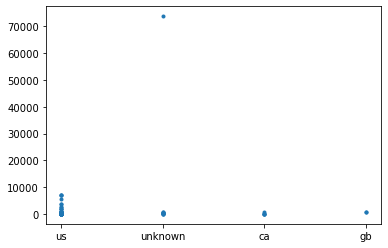

In [8]:
myplot = plt.plot(ufoDS['country'], ufoDS['duration_seconds'], '.')

In [52]:
def create_scatter(x,y, colormap):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(30,20))
        
        plt.scatter(x = ufoDS[x],
                    y = ufoDS[y],
                    c = np.log10(ufoDS['duration_seconds']),
                    cmap = colormap
                   )
        plt.colorbar()
        
#https://coderzcolumn.com/tutorials/data-science/interactive-charts-using-matplotlib-and-ipywidgets?fbclid=IwAR2Pxl6Vs3I-SCDWzB7DhROOgPr3UyCqLM5hCY7sJl2ev9TxGEzezmihbSQ

In [53]:
widget.interact(create_scatter, x = ufoDS, y = ufoDS, colormap = plt.colormaps());

interactive(children=(Dropdown(description='x', options=('date', 'city', 'state', 'country', 'shape', 'duratio…

In [59]:
def create_histogram(x, bins):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(30,20))
        
        plt.hist(x = ufoDS[x],
                    bins = bins
                   )

In [60]:
widget.interact(create_histogram, x = ufoDS, bins = range(1,51));

interactive(children=(Dropdown(description='x', options=('date', 'city', 'state', 'country', 'shape', 'duratio…